In [1]:
import os
import pandas as pd
from xml.dom import minidom
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, matthews_corrcoef, r2_score, roc_auc_score, auc, roc_curve

In [2]:
def load_semeval(t = 'train', lang = 'en'):
    semeval_keys = {
        'correct': 2,
        'incorrect': 1,
        'contradictory': 0
    }
    
    file = minidom.parse('../../datasets/semeval2013-3way-' + lang + '/' + t + '.xml')
    
    for exercise in file.getElementsByTagName('exercise'):
        
        yield (
            [ reference.firstChild.data for reference in exercise.getElementsByTagName('reference') ],
            [ (answer.firstChild.data, answer.attributes['accuracy'].value) for answer in exercise.getElementsByTagName('answer') ]
        )

In [3]:
semeval = pd.DataFrame([
    (t, len(r), len(a))
    for t in [ 'train', 'unseen_answers', 'unseen_questions', 'unseen_domains' ]
    for r, a in load_semeval(t, 'en') 
], columns = [ 'dataset', 'references', 'answers' ])

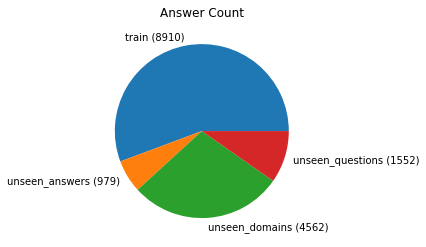

In [4]:
plt.axis('equal');
plt.pie(semeval.groupby([ 'dataset' ]).sum().reset_index()['answers'], 
        labels = semeval.groupby([ 'dataset' ]).count().reset_index()['dataset'].map(str) + 
        " (" + 
        semeval.groupby([ 'dataset' ]).sum().reset_index()['answers'].map(str) +
        ")"
)
plt.title('Answer Count')
plt.show()

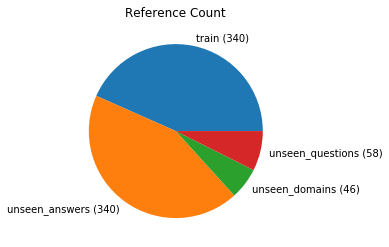

In [5]:
plt.axis('equal');
plt.pie(semeval.groupby([ 'dataset' ]).sum().reset_index()['references'], 
        labels = semeval.groupby([ 'dataset' ]).count().reset_index()['dataset'].map(str) + 
        " (" + 
        semeval.groupby([ 'dataset' ]).sum().reset_index()['references'].map(str) +
        ")"
)
plt.title('Reference Count')
plt.show()

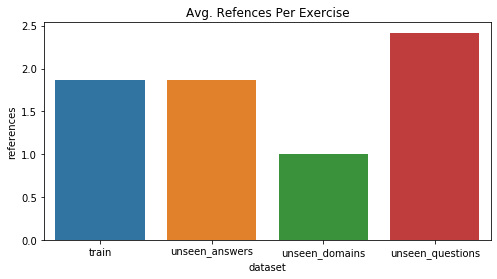

In [6]:
pds = semeval.groupby([ 'dataset' ]).count().reset_index()
pds['references'] = semeval.groupby([ 'dataset' ]).sum().reset_index()['references'] / semeval.groupby([ 'dataset' ]).count().reset_index()['references']

plt.figure(figsize=(8,4))
sns.barplot(x = 'dataset', y = 'references', data=pds)
plt.title('Avg. Refences Per Exercise')
plt.show()

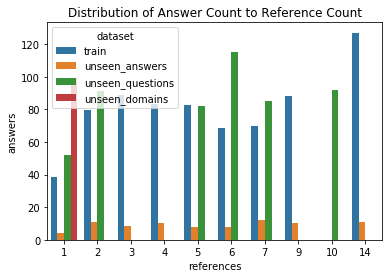

In [7]:
sns.barplot(
    x = 'references',
    y = 'answers',
    hue = 'dataset',
    ci= None,
    data = semeval
)
plt.title('Distribution of Answer Count to Reference Count')
plt.show()

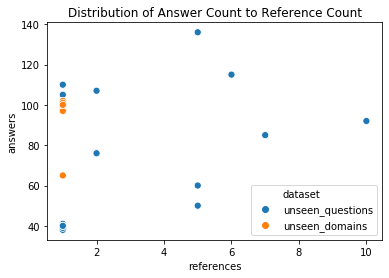

In [8]:
sns.scatterplot(
    x = 'references',
    y = 'answers',
    hue = 'dataset',
    s = 50,
    data = semeval[(semeval['dataset'] == 'unseen_questions') | (semeval['dataset'] == 'unseen_domains')]
)
plt.legend(loc='lower right')
plt.title('Distribution of Answer Count to Reference Count')
plt.show()

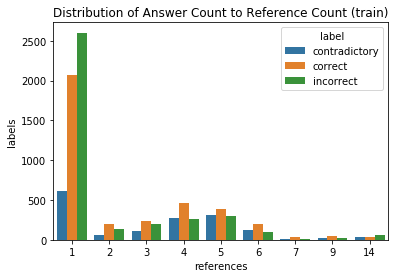

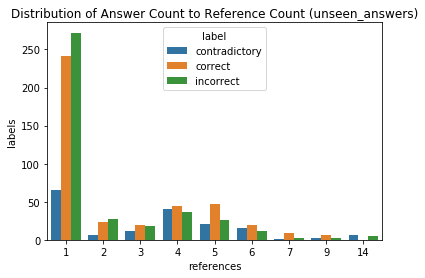

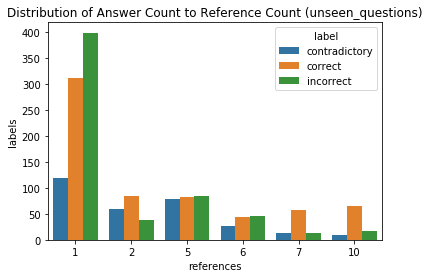

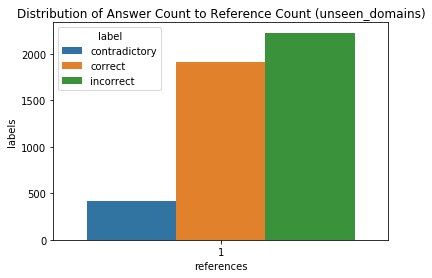

In [9]:
df = pd.DataFrame([
    (t, len(r), ans[1], 1)
    for t in [ 'train', 'unseen_answers', 'unseen_questions', 'unseen_domains' ]
    for r, a in load_semeval(t, 'en')
    for ans in a
], columns = [ 'dataset', 'references', 'label', 'labels' ]).groupby([ 'dataset', 'label', 'references' ]).count().reset_index()

for t in [ 'train', 'unseen_answers', 'unseen_questions', 'unseen_domains' ]:
    sns.barplot(
        x = 'references',
        y = 'labels',
        hue = 'label',
        ci = None,
        data = df[df['dataset'] == t]
    )
    plt.title('Distribution of Answer Count to Reference Count (%s)' % t)
    plt.show()